In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

In [3]:
train=pd.read_csv('train.csv')
display(train)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
test=pd.read_csv('test.csv')
display(test)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [5]:
oil_data = pd.read_csv('oil.csv')
submission_sample = pd.read_csv('sample_submission.csv')
holidays_data = pd.read_csv('holidays_events.csv')
store_data =  pd.read_csv('stores.csv')
transaction_data = pd.read_csv('transactions.csv')


In [6]:
display(store_data)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [7]:
def date_type(df):
    '''change the date column in a data frame to datetime'''
    df = df.copy()
    df['date']= pd.to_datetime(df['date'])
    return df

In [8]:
train=date_type(train)
test=date_type(test)

In [ ]:
def extract_datetime_features(df):
    df = df.copy()
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['dayOfMonth'] = df['date'].dt.day
    df['dayOfWeek'] = df['date'].dt.dayofweek
    return df

In [10]:
train=extract_datetime_features(train)
test=extract_datetime_features(test)

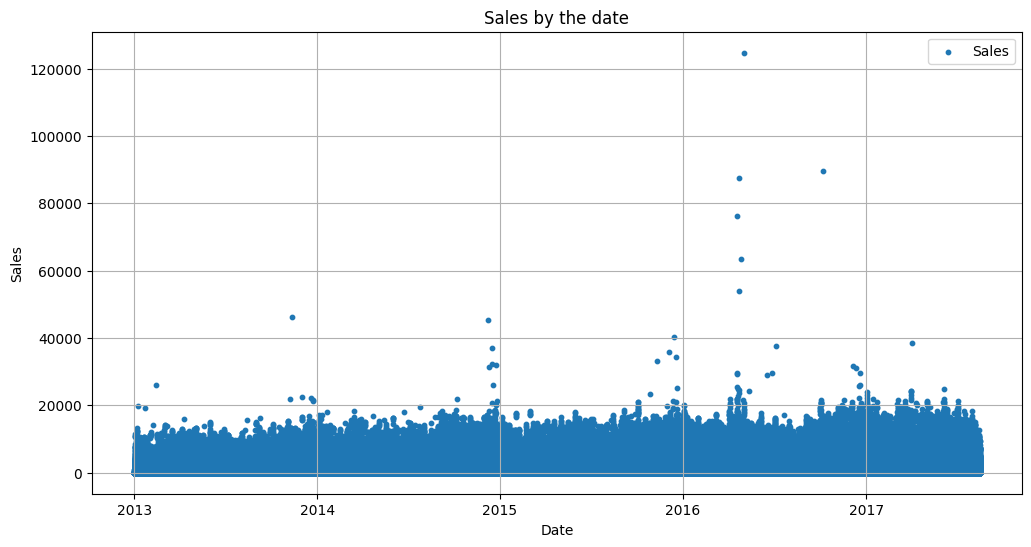

In [11]:
plt.figure(figsize=(12, 6)) 
plt.scatter(train['date'], train['sales'], label='Sales', marker='o', s=10)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by the date')
plt.legend()
plt.grid(True)
plt.show()

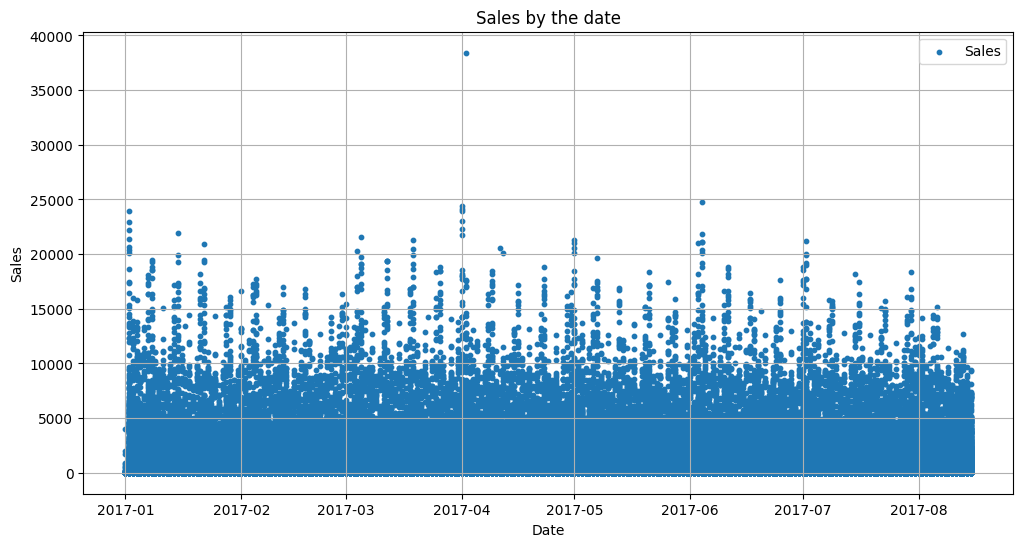

In [ ]:
df = train.copy()
df = df[df['date']>='01-01-2017']

plt.figure(figsize=(12, 6)) 
plt.scatter(df['date'], df['sales'], label='Sales', marker='o', s=10)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by the date')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Sales Average by Day of Month')

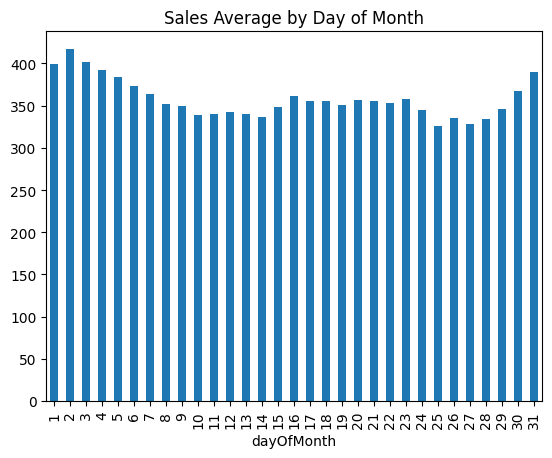

In [13]:
train.groupby('dayOfMonth').sales.mean().plot(kind='bar')
plt.title('Sales Average by Day of Month')

In [14]:
display(train)

,id,date,store_nbr,family,sales,onpromotion,year,month,dayOfMonth,dayOfWeek
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1


Text(0.5, 1.0, 'Average Sales by Day of week')

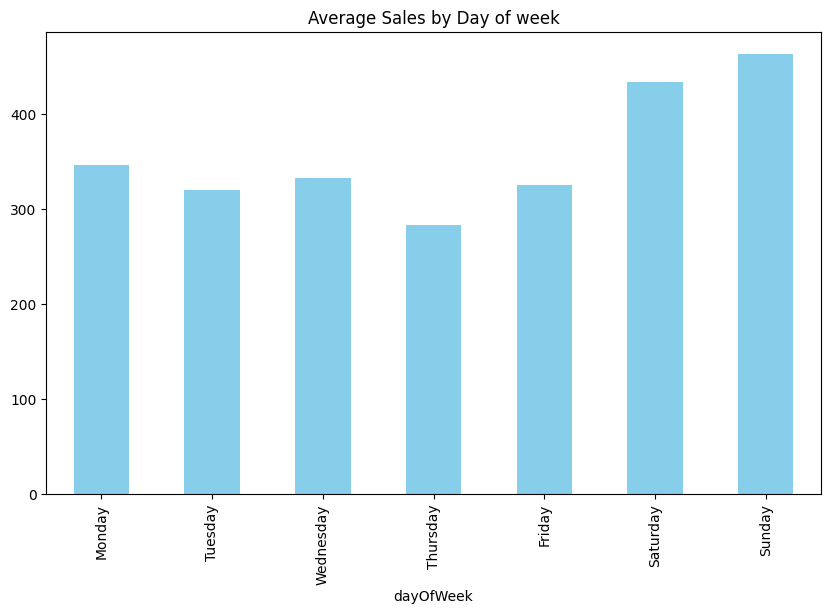

In [15]:
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
avg_sales_by_day = train.groupby('dayOfWeek').sales.mean()
plt.figure(figsize=(10, 6))
avg_sales_by_day.plot(kind='bar', color='skyblue')
plt.xticks(ticks=avg_sales_by_day.index, labels=[day_names[day] for day in avg_sales_by_day.index])

plt.title('Average Sales by Day of week')

In [16]:
train_store=train.merge(store_data, on = 'store_nbr', how='left')
train_store.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Quito,Pichincha,D,13


<Axes: xlabel='sales', ylabel='family'>

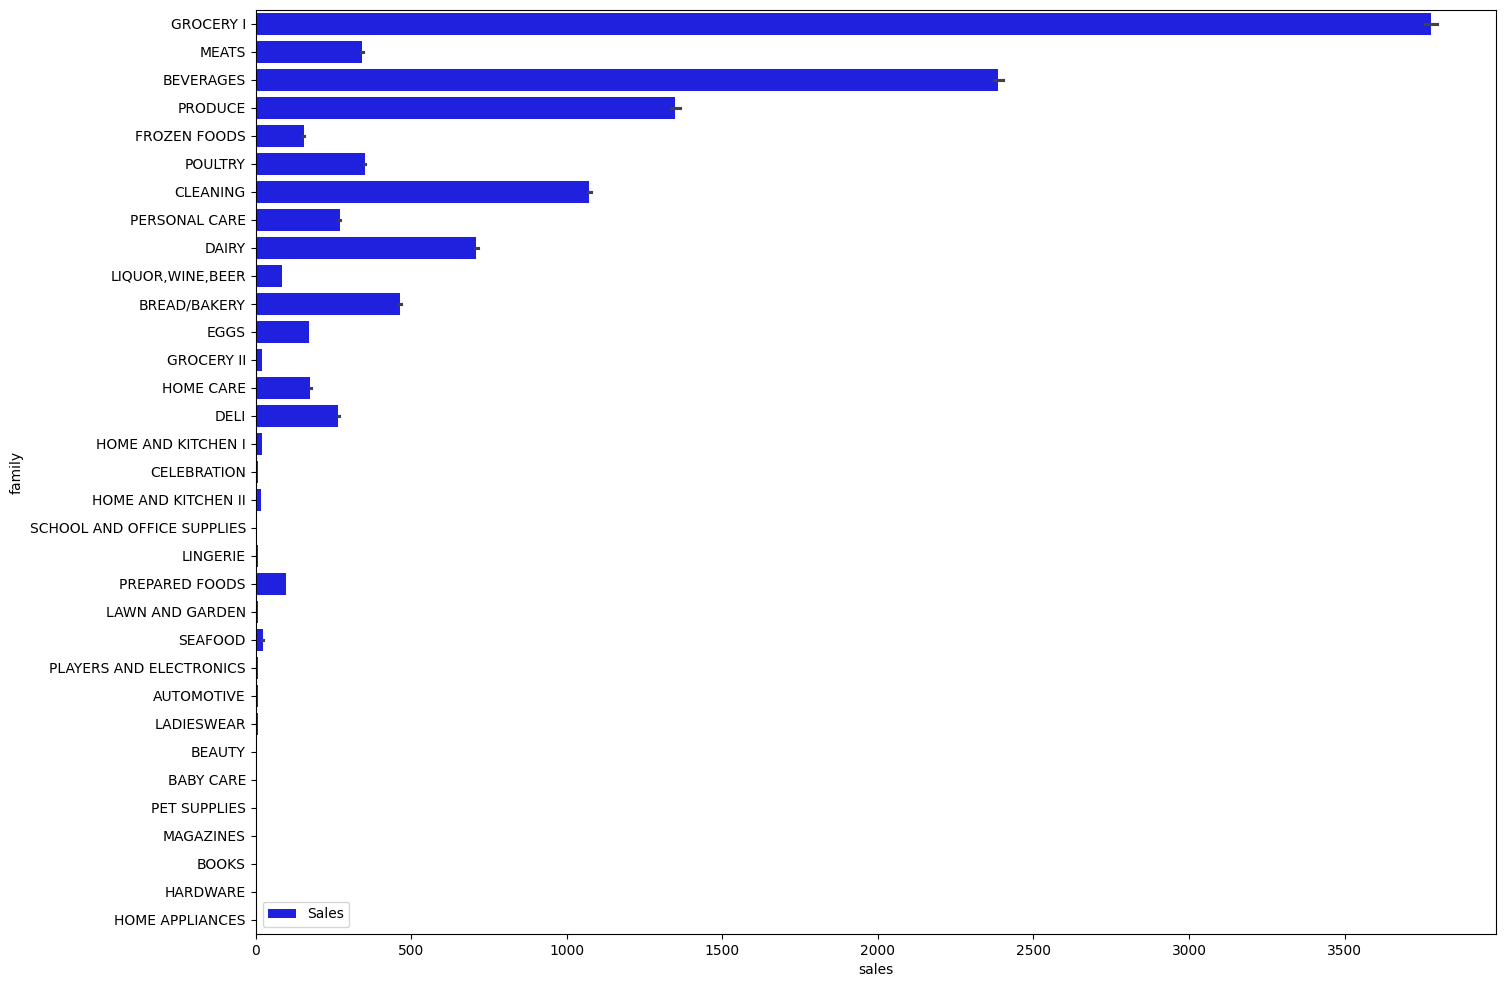

In [17]:
plt.figure(figsize=(16,12))
sns.barplot(x="sales", y="family", data=train_store.sort_values(by=['sales','family'], ascending=False),
            label="Sales", color="b")

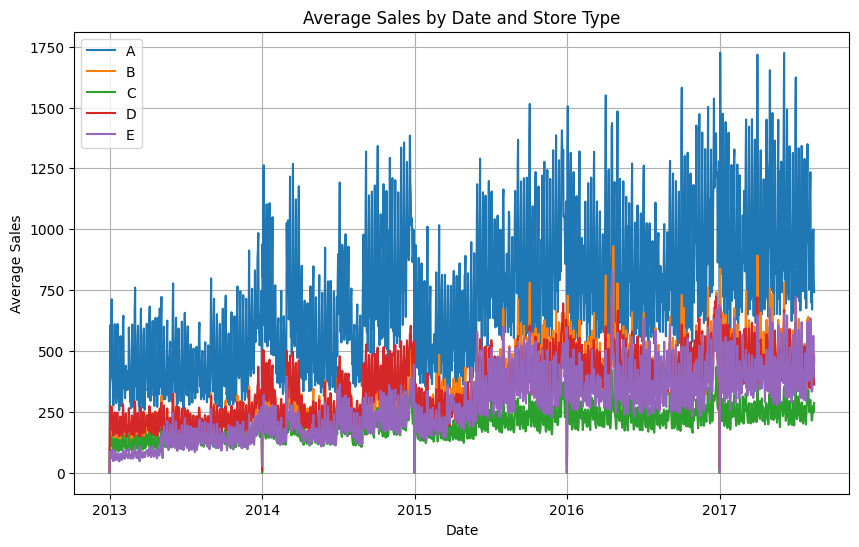

In [18]:

agg_sales = train_store.groupby(['date', 'type']).agg({"sales": "mean"}).reset_index()

plt.figure(figsize=(10, 6))
for store_type, data in agg_sales.groupby('type'):
    plt.plot(data['date'], data['sales'], label=store_type)

plt.title('Average Sales by Date and Store Type')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True)

plt.show()




In [19]:
df=pd.concat([train, test]).reset_index(drop=True)
display(df)

,id,date,store_nbr,family,sales,onpromotion,year,month,dayOfMonth,dayOfWeek
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1,2017,8,31,3
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,2017,8,31,3
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1,2017,8,31,3
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,2017,8,31,3


In [20]:
holidays_data.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [21]:
display(holidays_data)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [22]:
holidays_data.drop(columns=['description','locale_name'], inplace=True)

In [23]:
oil_data.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [24]:
oil_data[oil_data['dcoilwtico'].isna()]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


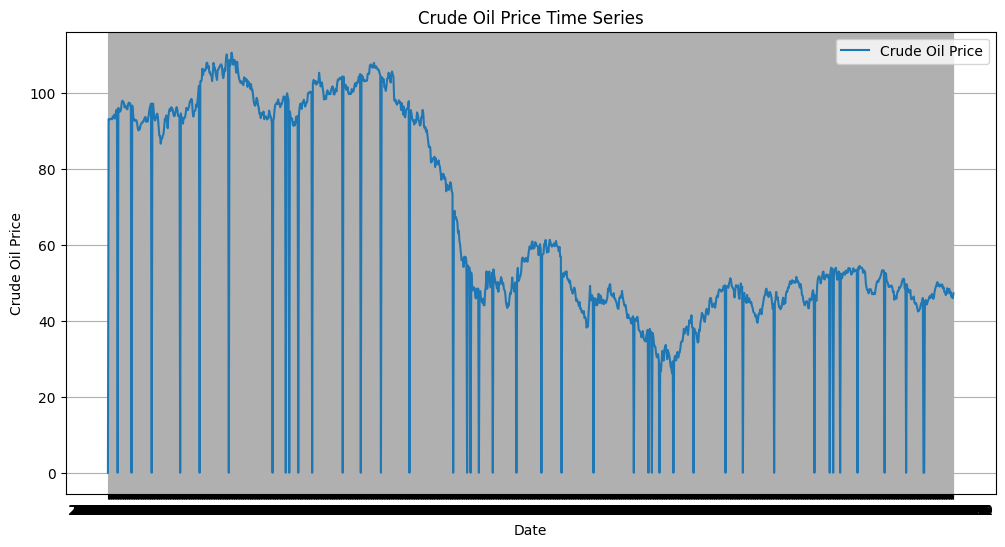

In [25]:
def plot_oil_with_nan(oil):
    oil = oil.copy()
    oil['dcoilwtico'].fillna(0, inplace=True)

    plt.figure(figsize=(12, 6))
    plt.plot(oil['date'], oil['dcoilwtico'], label='Crude Oil Price')
    plt.xlabel('Date')
    plt.ylabel('Crude Oil Price')
    plt.title('Crude Oil Price Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_oil_with_nan(oil_data)

C:\Users\pavan\AppData\Local\Temp\ipykernel_3312\2222218853.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil_data['dcoilwtico'].fillna(method='ffill', inplace=True)
C:\Users\pavan\AppData\Local\Temp\ipykernel_3312\2222218853.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil_data['dcoilwtico'].fillna(method='bfill', inplace=True)


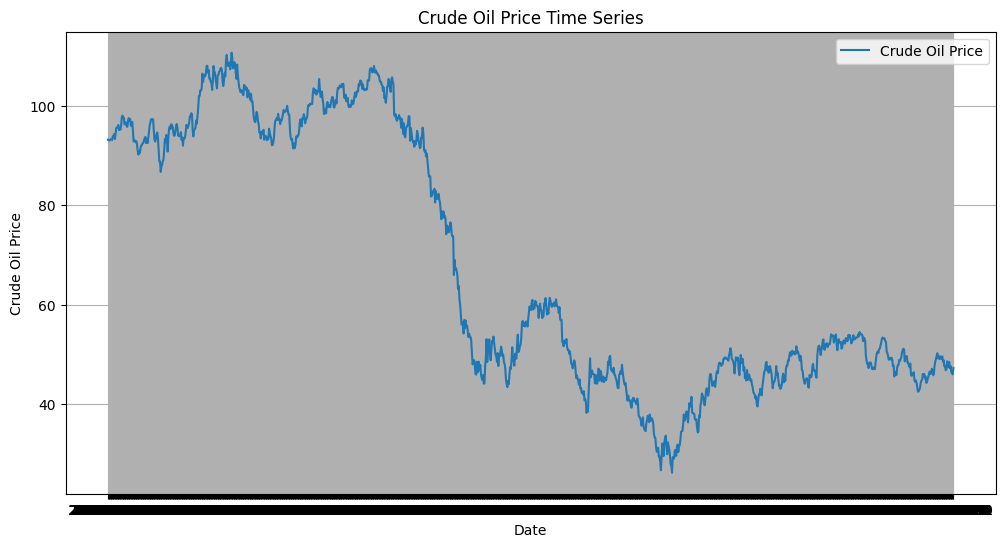

In [26]:
oil_data['dcoilwtico'].fillna(method='ffill', inplace=True)
oil_data['dcoilwtico'].fillna(method='bfill', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(oil_data['date'], oil_data['dcoilwtico'], label='Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Time Series')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
holidays_data = date_type(holidays_data)


In [28]:
df = df.merge(holidays_data,how='left',on='date')
display(df)

,id,date,store_nbr,family,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,type,locale,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Holiday,National,False
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Holiday,National,False
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Holiday,National,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Holiday,National,False
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Holiday,National,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,2017,8,31,3,NaN,NaN,NaN
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,2017,8,31,3,NaN,NaN,NaN
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,2017,8,31,3,NaN,NaN,NaN
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,2017,8,31,3,NaN,NaN,NaN


In [29]:
oil_data = date_type(oil_data)

In [30]:
df = df.merge(oil_data,how='left',on='date')
display(df)

,id,date,store_nbr,family,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,type,locale,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Holiday,National,False,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Holiday,National,False,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Holiday,National,False,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Holiday,National,False,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Holiday,National,False,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,2017,8,31,3,NaN,NaN,NaN,47.26
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,2017,8,31,3,NaN,NaN,NaN,47.26
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,2017,8,31,3,NaN,NaN,NaN,47.26
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,2017,8,31,3,NaN,NaN,NaN,47.26


In [31]:
def get_unique(df,column_name):
    '''Get the all values and the count for specific column'''
    unique_values_count = df[column_name].nunique()
    unique_values = df[column_name].unique()

    print(f"Number of unique values in {column_name}: {unique_values_count}")
    print("Unique values:")
    for value in unique_values:
        print(value)

In [32]:
df = pd.get_dummies(df, columns=['family'], dummy_na=False, prefix='family')

df = pd.get_dummies(df, columns=['type'], dummy_na=False, prefix='holidayType')
df = pd.get_dummies(df, columns=['locale'], dummy_na=False, prefix='holidayLocale')
df = pd.get_dummies(df, columns=['transferred'], dummy_na=False, prefix='holidayTransferred')

In [ ]:
# df

,id,date,store_nbr,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,dcoilwtico,...,holidayType_Bridge,holidayType_Event,holidayType_Holiday,holidayType_Transfer,holidayType_Work Day,holidayLocale_Local,holidayLocale_National,holidayLocale_Regional,holidayTransferred_False,holidayTransferred_True
0,0,2013-01-01,1,0.0,0,2013,1,1,1,93.14,...,False,False,True,False,False,False,True,False,True,False
1,1,2013-01-01,1,0.0,0,2013,1,1,1,93.14,...,False,False,True,False,False,False,True,False,True,False
2,2,2013-01-01,1,0.0,0,2013,1,1,1,93.14,...,False,False,True,False,False,False,True,False,True,False
3,3,2013-01-01,1,0.0,0,2013,1,1,1,93.14,...,False,False,True,False,False,False,True,False,True,False
4,4,2013-01-01,1,0.0,0,2013,1,1,1,93.14,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,NaN,1,2017,8,31,3,47.26,...,False,False,False,False,False,False,False,False,False,False
3082856,3029396,2017-08-31,9,NaN,0,2017,8,31,3,47.26,...,False,False,False,False,False,False,False,False,False,False
3082857,3029397,2017-08-31,9,NaN,1,2017,8,31,3,47.26,...,False,False,False,False,False,False,False,False,False,False
3082858,3029398,2017-08-31,9,NaN,9,2017,8,31,3,47.26,...,False,False,False,False,False,False,False,False,False,False


In [34]:
df.isna().sum()

id                                        0
date                                      0
store_nbr                                 0
sales                                 28512
onpromotion                               0
year                                      0
month                                     0
dayOfMonth                                0
dayOfWeek                                 0
dcoilwtico                           885654
family_AUTOMOTIVE                         0
family_BABY CARE                          0
family_BEAUTY                             0
family_BEVERAGES                          0
family_BOOKS                              0
family_BREAD/BAKERY                       0
family_CELEBRATION                        0
family_CLEANING                           0
family_DAIRY                              0
family_DELI                               0
family_EGGS                               0
family_FROZEN FOODS                       0
family_GROCERY I                

In [35]:
new_oil=df[['date','dcoilwtico']].drop_duplicates(subset='date', keep="first").reset_index(drop=True)
print(new_oil.shape)
print(new_oil.isna().sum())

(1700, 2)
date            0
dcoilwtico    485
dtype: int64


C:\Users\pavan\AppData\Local\Temp\ipykernel_3312\3113642035.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_oil['dcoilwtico'].fillna(method='ffill', inplace=True)
C:\Users\pavan\AppData\Local\Temp\ipykernel_3312\3113642035.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_oil['dcoilwtico'].fillna(method='bfill', inplace=True)


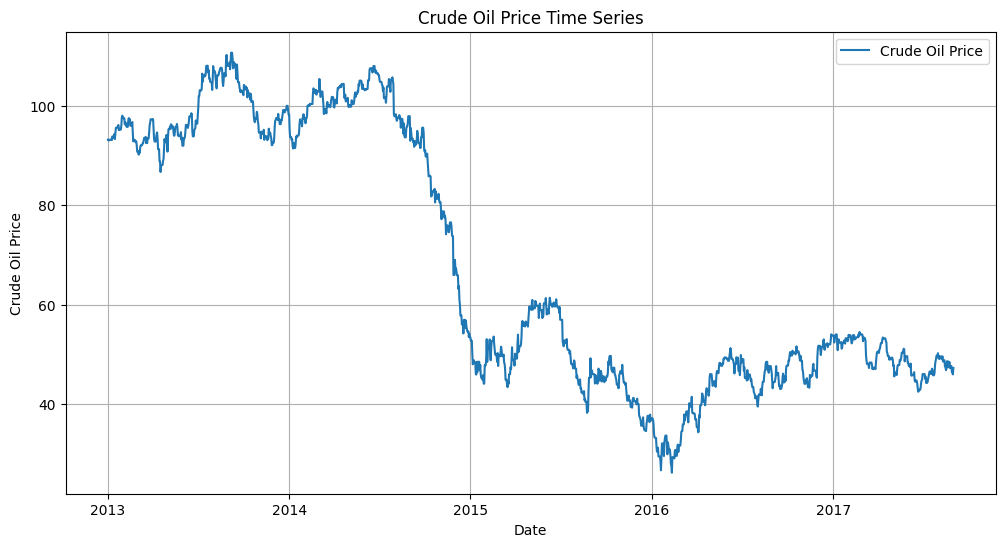

In [36]:
new_oil['dcoilwtico'].fillna(method='ffill', inplace=True)
new_oil['dcoilwtico'].fillna(method='bfill', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(new_oil['date'], new_oil['dcoilwtico'], label='Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Time Series')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
print(new_oil.isna().sum())

date          0
dcoilwtico    0
dtype: int64


In [ ]:
df=df.drop(columns=['dcoilwtico']) 
df = df.merge(new_oil,how='left',on='date')
display(df)

,id,date,store_nbr,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,family_AUTOMOTIVE,...,holidayType_Event,holidayType_Holiday,holidayType_Transfer,holidayType_Work Day,holidayLocale_Local,holidayLocale_National,holidayLocale_Regional,holidayTransferred_False,holidayTransferred_True,dcoilwtico
0,0,2013-01-01,1,0.0,0,2013,1,1,1,True,...,False,True,False,False,False,True,False,True,False,93.14
1,1,2013-01-01,1,0.0,0,2013,1,1,1,False,...,False,True,False,False,False,True,False,True,False,93.14
2,2,2013-01-01,1,0.0,0,2013,1,1,1,False,...,False,True,False,False,False,True,False,True,False,93.14
3,3,2013-01-01,1,0.0,0,2013,1,1,1,False,...,False,True,False,False,False,True,False,True,False,93.14
4,4,2013-01-01,1,0.0,0,2013,1,1,1,False,...,False,True,False,False,False,True,False,True,False,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,NaN,1,2017,8,31,3,False,...,False,False,False,False,False,False,False,False,False,47.26
3082856,3029396,2017-08-31,9,NaN,0,2017,8,31,3,False,...,False,False,False,False,False,False,False,False,False,47.26
3082857,3029397,2017-08-31,9,NaN,1,2017,8,31,3,False,...,False,False,False,False,False,False,False,False,False,47.26
3082858,3029398,2017-08-31,9,NaN,9,2017,8,31,3,False,...,False,False,False,False,False,False,False,False,False,47.26


In [39]:
print(df.isna().sum())

id                                       0
date                                     0
store_nbr                                0
sales                                28512
onpromotion                              0
year                                     0
month                                    0
dayOfMonth                               0
dayOfWeek                                0
family_AUTOMOTIVE                        0
family_BABY CARE                         0
family_BEAUTY                            0
family_BEVERAGES                         0
family_BOOKS                             0
family_BREAD/BAKERY                      0
family_CELEBRATION                       0
family_CLEANING                          0
family_DAIRY                             0
family_DELI                              0
family_EGGS                              0
family_FROZEN FOODS                      0
family_GROCERY I                         0
family_GROCERY II                        0
family_HARD

In [40]:
print(f'Before removing duplicates {df.shape}')

Before removing duplicates (3082860, 54)


In [41]:
df[df['id'].duplicated(keep='first')]

,id,date,store_nbr,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,family_AUTOMOTIVE,...,holidayType_Event,holidayType_Holiday,holidayType_Transfer,holidayType_Work Day,holidayLocale_Local,holidayLocale_National,holidayLocale_Regional,holidayTransferred_False,holidayTransferred_True,dcoilwtico
233443,233442,2013-05-12,1,1.00000,0,2013,5,12,6,True,...,True,False,False,False,False,True,False,True,False,95.81
233445,233443,2013-05-12,1,0.00000,0,2013,5,12,6,False,...,True,False,False,False,False,True,False,True,False,95.81
233447,233444,2013-05-12,1,0.00000,0,2013,5,12,6,False,...,True,False,False,False,False,True,False,True,False,95.81
233449,233445,2013-05-12,1,384.00000,0,2013,5,12,6,False,...,True,False,False,False,False,True,False,True,False,95.81
233451,233446,2013-05-12,1,0.00000,0,2013,5,12,6,False,...,True,False,False,False,False,True,False,True,False,95.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977713,2924257,2017-07-03,9,514.33100,0,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02
2977715,2924258,2017-07-03,9,135.72101,1,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02
2977717,2924259,2017-07-03,9,1797.21200,9,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02
2977719,2924260,2017-07-03,9,2.00000,0,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02


In [42]:
df[df['id'].duplicated(keep=False)]

,id,date,store_nbr,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,family_AUTOMOTIVE,...,holidayType_Event,holidayType_Holiday,holidayType_Transfer,holidayType_Work Day,holidayLocale_Local,holidayLocale_National,holidayLocale_Regional,holidayTransferred_False,holidayTransferred_True,dcoilwtico
233442,233442,2013-05-12,1,1.000,0,2013,5,12,6,True,...,False,True,False,False,True,False,False,True,False,95.81
233443,233442,2013-05-12,1,1.000,0,2013,5,12,6,True,...,True,False,False,False,False,True,False,True,False,95.81
233444,233443,2013-05-12,1,0.000,0,2013,5,12,6,False,...,False,True,False,False,True,False,False,True,False,95.81
233445,233443,2013-05-12,1,0.000,0,2013,5,12,6,False,...,True,False,False,False,False,True,False,True,False,95.81
233446,233444,2013-05-12,1,0.000,0,2013,5,12,6,False,...,False,True,False,False,True,False,False,True,False,95.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977717,2924259,2017-07-03,9,1797.212,9,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02
2977718,2924260,2017-07-03,9,2.000,0,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02
2977719,2924260,2017-07-03,9,2.000,0,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02
2977720,2924261,2017-07-03,9,17.335,0,2017,7,3,0,False,...,False,True,False,False,True,False,False,True,False,46.02


In [ ]:
boolean_columns = [
    'holidayType_Additional',
    'holidayType_Bridge',
    'holidayType_Event',
    'holidayType_Holiday',
    'holidayType_Transfer',
    'holidayType_Work Day',
    'holidayLocale_Local',
    'holidayLocale_National',
    'holidayLocale_Regional',
    'holidayTransferred_False',
    'holidayTransferred_True'
]

df_grouped = df.groupby('id')[boolean_columns].max().reset_index()

non_boolean_columns = [col for col in df.columns if col not in boolean_columns]
non_boolean_columns.remove('id')
df_non_boolean = df.groupby('id')[non_boolean_columns].first().reset_index()

df = pd.merge(df_non_boolean, df_grouped, on='id')

In [44]:
df[df['id'].duplicated(keep=False)]

,id,date,store_nbr,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,family_AUTOMOTIVE,...,holidayType_Bridge,holidayType_Event,holidayType_Holiday,holidayType_Transfer,holidayType_Work Day,holidayLocale_Local,holidayLocale_National,holidayLocale_Regional,holidayTransferred_False,holidayTransferred_True


In [45]:
print(f'After removing duplicates {df.shape}')

After removing duplicates (3029400, 54)


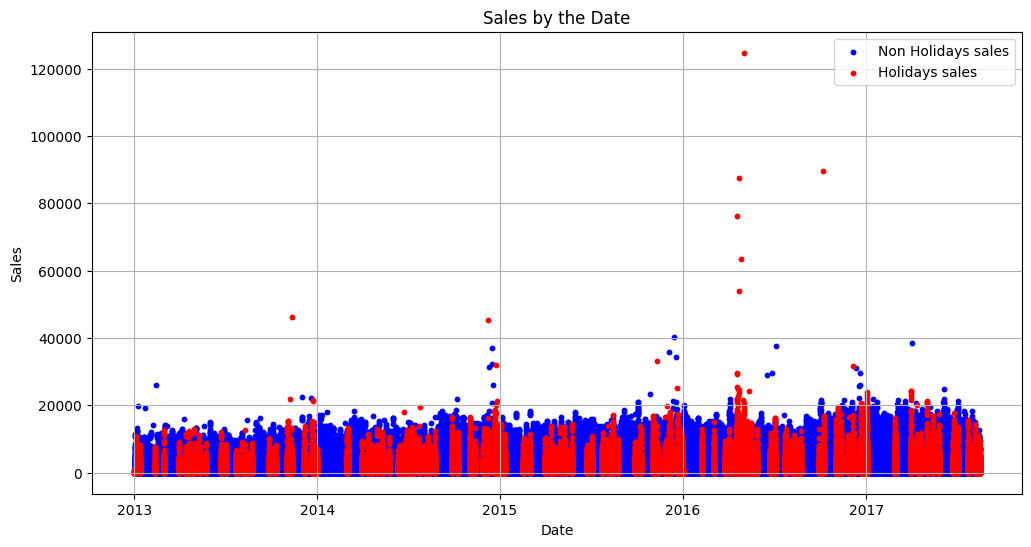

In [ ]:
plt.figure(figsize=(12, 6))

condition = (df['holidayTransferred_True'] == False) & (df['holidayTransferred_False'] == False)

plt.scatter(
    df[condition]['date'], df[condition]['sales'],
    label='Non Holidays sales', marker='o', s=10, color='blue'
)
plt.scatter(
    df[~condition]['date'], df[~condition]['sales'],
    label='Holidays sales', marker='o', s=10, color='red'
)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by the Date')
plt.legend()
plt.grid(True)

plt.show()

In [83]:
train = df[df['date']<='15-08-2017'].reset_index(drop=True)
test = df[df['date']>'15-08-2017'].reset_index(drop=True)

In [84]:
train

,id,date,store_nbr,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,family_AUTOMOTIVE,...,holidayType_Bridge,holidayType_Event,holidayType_Holiday,holidayType_Transfer,holidayType_Work Day,holidayLocale_Local,holidayLocale_National,holidayLocale_Regional,holidayTransferred_False,holidayTransferred_True
0,0,2013-01-01,1,0.000,0,2013,1,1,1,True,...,False,False,True,False,False,False,True,False,True,False
1,1,2013-01-01,1,0.000,0,2013,1,1,1,False,...,False,False,True,False,False,False,True,False,True,False
2,2,2013-01-01,1,0.000,0,2013,1,1,1,False,...,False,False,True,False,False,False,True,False,True,False
3,3,2013-01-01,1,0.000,0,2013,1,1,1,False,...,False,False,True,False,False,False,True,False,True,False
4,4,2013-01-01,1,0.000,0,2013,1,1,1,False,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,438.133,0,2017,8,15,1,False,...,False,False,True,False,False,True,False,False,True,False
3000884,3000884,2017-08-15,9,154.553,1,2017,8,15,1,False,...,False,False,True,False,False,True,False,False,True,False
3000885,3000885,2017-08-15,9,2419.729,148,2017,8,15,1,False,...,False,False,True,False,False,True,False,False,True,False
3000886,3000886,2017-08-15,9,121.000,8,2017,8,15,1,False,...,False,False,True,False,False,True,False,False,True,False


In [85]:
test

,id,date,store_nbr,sales,onpromotion,year,month,dayOfMonth,dayOfWeek,family_AUTOMOTIVE,...,holidayType_Bridge,holidayType_Event,holidayType_Holiday,holidayType_Transfer,holidayType_Work Day,holidayLocale_Local,holidayLocale_National,holidayLocale_Regional,holidayTransferred_False,holidayTransferred_True
0,3000888,2017-08-16,1,NaN,0,2017,8,16,2,True,...,False,False,False,False,False,False,False,False,False,False
1,3000889,2017-08-16,1,NaN,0,2017,8,16,2,False,...,False,False,False,False,False,False,False,False,False,False
2,3000890,2017-08-16,1,NaN,2,2017,8,16,2,False,...,False,False,False,False,False,False,False,False,False,False
3,3000891,2017-08-16,1,NaN,20,2017,8,16,2,False,...,False,False,False,False,False,False,False,False,False,False
4,3000892,2017-08-16,1,NaN,0,2017,8,16,2,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,NaN,1,2017,8,31,3,False,...,False,False,False,False,False,False,False,False,False,False
28508,3029396,2017-08-31,9,NaN,0,2017,8,31,3,False,...,False,False,False,False,False,False,False,False,False,False
28509,3029397,2017-08-31,9,NaN,1,2017,8,31,3,False,...,False,False,False,False,False,False,False,False,False,False
28510,3029398,2017-08-31,9,NaN,9,2017,8,31,3,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
train.drop('id', axis=1, inplace=True)

split_date = '2017-08-01' 

train_set = train[train['date'] < split_date]
val_set = train[train['date'] >= split_date]

train_set.drop('date', axis=1, inplace=True)
val_set.drop('date', axis=1, inplace=True)

X_train = train_set.drop('sales', axis=1) 
y_train = train_set['sales']  
X_val = val_set.drop('sales', axis=1)  
y_val = val_set['sales'] 

C:\Users\pavan\AppData\Local\Temp\ipykernel_3312\645909009.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop('date', axis=1, inplace=True)
C:\Users\pavan\AppData\Local\Temp\ipykernel_3312\645909009.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set.drop('date', axis=1, inplace=True)


In [87]:
test_set_date = test.copy().drop('sales', axis=1)

X_test=test.drop(['id','sales','date'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [54]:
import xgboost as xgb

reg = xgb.XGBRegressor(n_eastimators=1000,early_stopping_rounds=50,learning_rate=0.1)
reg.fit(X_train,y_train,
       eval_set=[(X_train,y_train),(X_val,y_val)],
       eval_metric=['mae', 'rmse'],
       verbose=10)

c:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_eastimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mae:471.03172	validation_0-rmse:1018.50120	validation_1-mae:529.58596	validation_1-rmse:1147.87703
[10]	validation_0-mae:258.12646	validation_0-rmse:599.06049	validation_1-mae:279.59424	validation_1-rmse:609.83742
[20]	validation_0-mae:197.80693	validation_0-rmse:494.54361	validation_1-mae:207.44299	validation_1-rmse:463.14112
[30]	validation_0-mae:170.86863	validation_0-rmse:456.79635	validation_1-mae:180.39822	validation_1-rmse:422.05345
[40]	validation_0-mae:156.15316	validation_0-rmse:430.56955	validation_1-mae:166.33804	validation_1-rmse:400.81239
[50]	validation_0-mae:145.92978	validation_0-rmse:410.91222	validation_1-mae:157.00170	validation_1-rmse:382.87326
[60]	validation_0-mae:138.39972	validation_0-rmse:396.62457	validation_1-mae:149.89196	validation_1-rmse:369.54899
[70]	validation_0-mae:133.51985	validation_0-rmse:386.09005	validation_1-mae:145.70904	validation_1-rmse:361.00671
[80]	validation_0-mae:129.52089	validation_0-rmse:378.97230	validation_1-mae:14

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_eastimators=1000, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
eval_results = reg.evals_result() 
train_mae = eval_results['validation_0']['mae']
val_mae = eval_results['validation_1']['mae']
train_rmse = eval_results['validation_0']['rmse'] 
val_rmse = eval_results['validation_1']['rmse']  

print("Training MAE:", train_mae[-1]) 
print("Validation MAE:", val_mae[-1]) 
print("Training RMSE:", train_rmse[-1])
print("Validation RMSE:", val_rmse[-1]) 

Training MAE: 123.69650597145441
Validation MAE: 135.31644482221154
Training RMSE: 364.58797364098047
Validation RMSE: 341.9032568633017


In [ ]:
from sklearn.metrics import r2_score

y_train_pred = reg.predict(X_train)
y_val_pred = reg.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Training R^2 score:", r2_train)
print("Validation R^2 score:", r2_val)


Training R^2 score: 0.8902624551348315
Validation R^2 score: 0.924496417772201


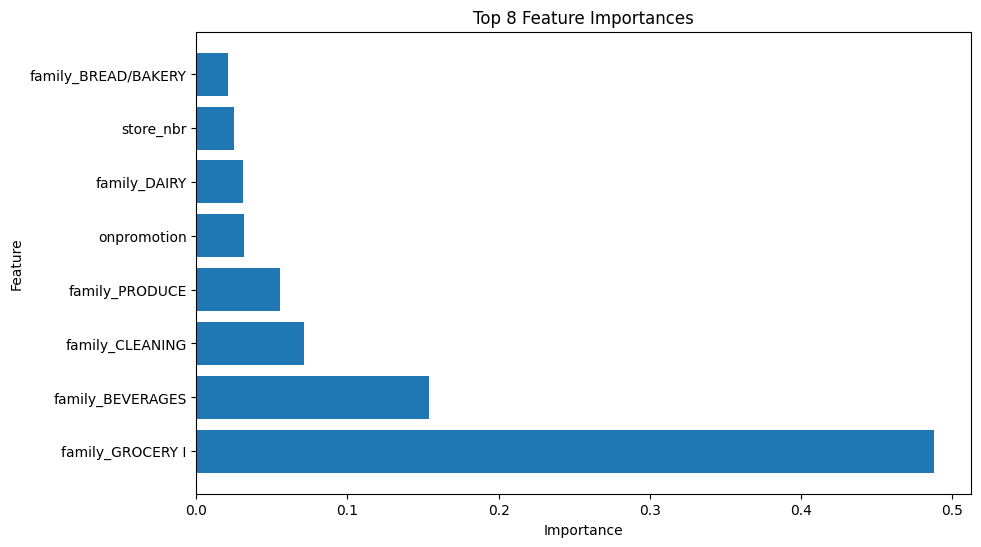

In [ ]:
feature_importances = reg.feature_importances_

feature_names = train.drop(columns=['date', 'sales']).columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_8_features = importance_df.head(8)

plt.figure(figsize=(10, 6))
plt.barh(top_8_features['Feature'], top_8_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 8 Feature Importances')
plt.show()

In [59]:
type(X_train.shape[1])

int

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')  

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
92943/92943 ━━━━━━━━━━━━━━━━━━━━ 120s 1ms/step - loss: 540693.3125 - val_loss: 324769.7500
Epoch 2/100
92943/92943 ━━━━━━━━━━━━━━━━━━━━ 79s 850us/step - loss: 367552.5938 - val_loss: 276718.5312
Epoch 3/100
92943/92943 ━━━━━━━━━━━━━━━━━━━━ 122s 1ms/step - loss: 298271.3438 - val_loss: 276328.9688
Epoch 4/100
92943/92943 ━━━━━━━━━━━━━━━━━━━━ 138s 1ms/step - loss: 276207.3750 - val_loss: 267609.1250
Epoch 5/100
92943/92943 ━━━━━━━━━━━━━━━━━━━━ 137s 1ms/step - loss: 284521.7188 - val_loss: 261910.2031
Epoch 6/100
92943/92943 ━━━━━━━━━━━━━━━━━━━━ 92s 985us/step - loss: 249989.0938 - val_loss: 262261.5938
Epoch 7/100
92943/92943 ━━━━━━━━━━━━━━━━━━━━ 217s 2ms/step - loss: 248451.0938 - val_loss: 276634.8125
Epoch 8/100
92943/92943 ━━━━━━━━━━━━━━━━━━━━ 182s 2ms/step - loss: 245475.8906 - val_loss: 258617.8750
Epoch 9/100
92943/92943 ━━━━━━━━━━━━━━━━━━━━ 166s 2ms/step - loss: 235785.7500 - val_loss: 259093.6875
Epoch 10/100
92943/92943 ━━━━━━━━━━━━━━━━━━━━ 171s 2ms/step - loss: 233

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_val_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", r2)


In [ ]:

model = keras.models.load_model('dnn.h5')

In [ ]:

X_test=X_test.astype(np.float32)
y_test_pred = model.predict(X_test)

predictions_df = pd.DataFrame({'id': test['id'], 'sales': y_test_pred.flatten()})

predictions_df['sales'] = predictions_df['sales'].clip(lower=0)

print(predictions_df)

891/891 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
            id        sales
0      3000888    21.430651
1      3000889    21.294207
2      3000890    19.682009
3      3000891  3006.041504
4      3000892    21.261232
...        ...          ...
28507  3029395   465.663513
28508  3029396   114.384277
28509  3029397  1556.145142
28510  3029398     6.057191
28511  3029399    26.040907

[28512 rows x 2 columns]


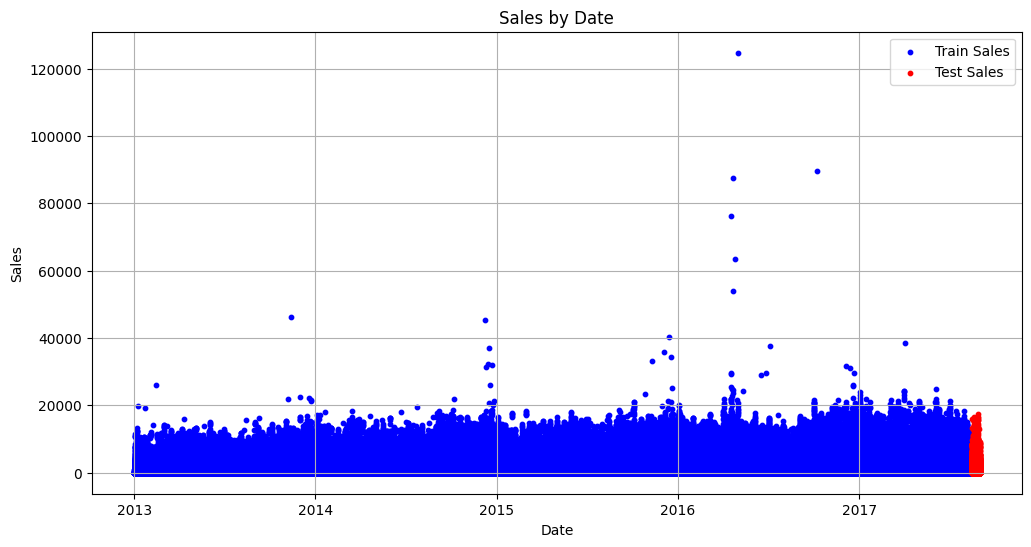

In [ ]:
test_set_date=test_set_date.merge(predictions_df,how='left',on='id')

plt.figure(figsize=(12, 6))
plt.scatter(train['date'], train['sales'], label='Train Sales', marker='o', s=10, c='blue')

plt.scatter(test_set_date['date'], test_set_date['sales'], label='Test Sales', marker='o', s=10, c='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by Date')
plt.legend()
plt.grid(True)
plt.show()


In [99]:
# test_set_date.drop(columns=['sales_x','sales_y'], inplace=True)

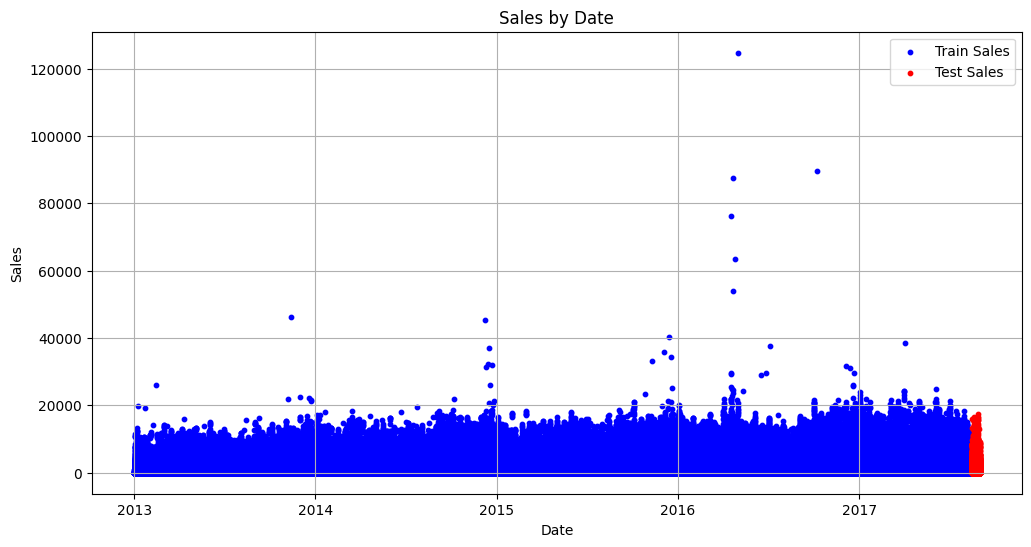

In [ ]:
test_set_date=test_set_date.merge(predictions_df,how='left',on='id')

plt.figure(figsize=(12, 6))
plt.scatter(train['date'], train['sales'], label='Train Sales', marker='o', s=10, c='blue')

plt.scatter(test_set_date['date'], test_set_date['sales'], label='Test Sales', marker='o', s=10, c='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by Date')
plt.legend()
plt.grid(True)
plt.show()


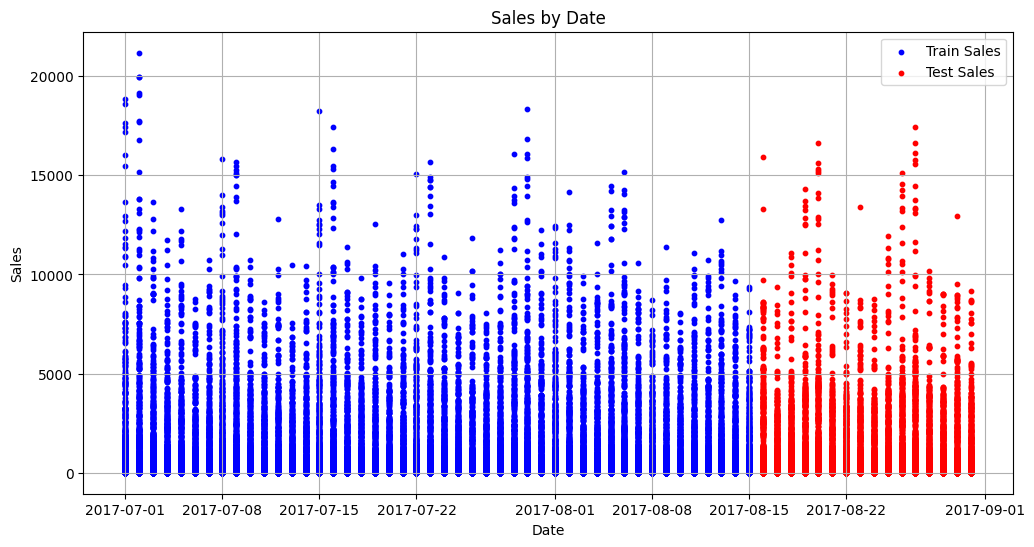

In [ ]:
train=train[train['date']>='07-01-2017']

plt.figure(figsize=(12, 6))
plt.scatter(train['date'], train['sales'], label='Train Sales', marker='o', s=10, c='blue')

plt.scatter(test_set_date['date'], test_set_date['sales'], label='Test Sales', marker='o', s=10, c='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by Date')
plt.legend()
plt.grid(True)
plt.show()


In [98]:
predictions_df

,id,sales
0,3000888,21.430651
1,3000889,21.294207
2,3000890,19.682009
3,3000891,3006.041504
4,3000892,21.261232
...,...,...
28507,3029395,465.663513
28508,3029396,114.384277
28509,3029397,1556.145142
28510,3029398,6.057191
